In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
from importHelpers.response import *

<IPython.core.display.Javascript object>


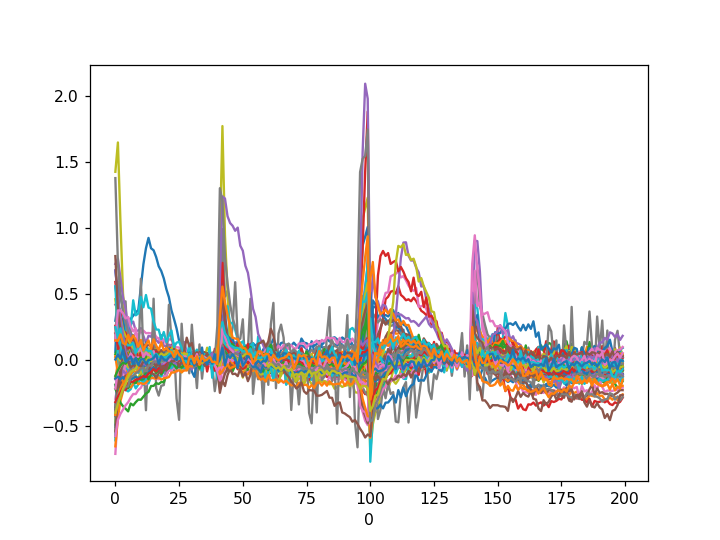

In [127]:
initial = pd.read_csv(r"data\\190819_file24_concat.csv", index_col=0, header=None).T
initial.T.plot(legend=False)

In [3]:
initial

0        0         1         2         3         4         5         6    \
1   0.296508  0.431993  0.329875  0.329262  0.313243  0.300434  0.310191   
2  -0.491238 -0.303480 -0.237546 -0.182344 -0.115005 -0.043841  0.012246   
3  -0.356916 -0.210573 -0.189948 -0.146712 -0.132396 -0.137262 -0.124111   
4  -0.581451 -0.325331 -0.263738 -0.192541 -0.152212 -0.110454 -0.095994   
5  -0.406185  0.049042  0.223303  0.310755  0.273653  0.322463  0.270237   
6  -0.491532 -0.242878 -0.172337 -0.046181 -0.022043  0.008252 -0.002097   
7  -0.712955 -0.395644 -0.257366 -0.176899 -0.058378  0.029430  0.097120   
8  -0.508001 -0.175635 -0.104859 -0.063473 -0.038040 -0.038478 -0.044894   
9  -0.474422 -0.267464 -0.289981 -0.203153 -0.206636 -0.184895 -0.130857   
10 -0.405779 -0.097706 -0.076881 -0.084713 -0.039811 -0.079621 -0.112943   
11  0.061184  0.550880  0.489275  0.386728  0.304934  0.268203  0.196728   
12 -0.144079 -0.025186  0.028441  0.010592  0.025171  0.055296 -0.030246   
13  0.043823  0.088340  0.095128  0.062057  0.079398  0.005216  0.074086   
14  0.201000  0.168182  0.144451  0.221895  0.066692  0.011254  0.018243   
15  0.418318  0.380339  0.249922  0.245061  0.182866  0.143012  0.111600   
16 -0.427091 -0.254591 -0.192103 -0.164528 -0.117896 -0.115326 -0.107655   
17 -0.295739 -0.182291 -0.132101 -0.098173 -0.035276 -0.057607 -0.051313   
18  0.146821  0.594472 -0.157013  0.148351  0.443635  0.067824  0.223742   
19  1.425565  1.647967  1.041906  0.504385  0.284658  0.126463  0.077546   
20 -0.610045  0.150345  0.168552  0.358275  0.219205  0.299124  0.240415   
21  0.673972  0.510013  0.278945  0.312711  0.139685  0.196465  0.105689   
22 -0.655466 -0.437150 -0.310824 -0.239165 -0.168729 -0.141506 -0.091990   
23 -0.221578 -0.260729 -0.325232 -0.351728 -0.370292 -0.390654 -0.331461   
24  0.590192  0.410056  0.361572  0.185089  0.208509  0.085347  0.100640   
25  0.726635  0.766974  0.618983  0.472957  0.385548  0.243176  0.166853   
26 -0.542354 -0.282792 -0.065684  0.036439  0.171105  0.116863  0.149959   
27 -0.577798 -0.454954 -0.408865 -0.377093 -0.344862 -0.321623 -0.286242   
28  1.377686  0.730969  0.487747  0.358600  0.282675  0.208228  0.136838   
29  0.022431  0.013988 -0.006540 -0.011882 -0.009262 -0.055957 -0.051971   
30 -0.190767 -0.232963 -0.222215 -0.217835 -0.225968 -0.239070 -0.222405   
31  0.554667  0.419531  0.217198  0.092706  0.013023 -0.009892 -0.063212   
32  0.027091 -0.107447 -0.128754 -0.162667 -0.194965 -0.201483 -0.210233   
33 -0.188155 -0.267470 -0.211743 -0.211439 -0.214199 -0.216441 -0.168440   
34  0.257796  0.082205  0.113150  0.107433  0.023032  0.013427  0.026545   
35 -0.146628 -0.136594 -0.138902 -0.082399 -0.101845 -0.097484 -0.059130   
36 -0.381751 -0.161290 -0.122478  0.049882  0.063255  0.130445  0.122147   
37 -0.217757 -0.084781 -0.048607 -0.018548 -0.016243 -0.000654  0.048536   
38 -0.346314 -0.256159 -0.230964 -0.187423 -0.155980 -0.113812 -0.075099   
39  0.459537  0.293534  0.322157  0.228312  0.179038  0.157790  0.116822   
40  0.557794  0.187519  0.107101  0.022125 -0.007495 -0.001273 -0.061594   
41 -0.140055 -0.127158 -0.148095 -0.130196 -0.160701 -0.142083 -0.153164   
42 -0.417093 -0.299881 -0.218167 -0.179654 -0.153665 -0.103104 -0.111476   
43 -0.121773 -0.078957 -0.043080 -0.019391 -0.029289 -0.007426 -0.003951   
44 -0.320062 -0.278521 -0.247646 -0.208317 -0.230446 -0.174913 -0.167636   
45  0.680371  0.475071  0.316735  0.190626  0.063111 -0.000647 -0.002238   
46  0.786523  0.368304  0.232016  0.098742  0.026306 -0.008484 -0.059181   
47  0.146531  0.374801  0.374441  0.353271  0.314264  0.324471  0.253622   
48 -0.389523 -0.314855 -0.276895 -0.229356 -0.203710 -0.201181 -0.128998   
49 -0.400422 -0.335594 -0.277441 -0.219007 -0.183507 -0.129368 -0.090944   
50  0.247374  0.163737  0.239131  0.124610  0.127140  0.109337  0.111136   
51  0.003018  0.039820  0.008287  0.075337 -0.015085  0.001460  0.025371   
52  0.147880  0.144092  0.193125  0.128624  0.11

In [4]:
initial.drop(range(86, 135), axis=1, inplace=True)

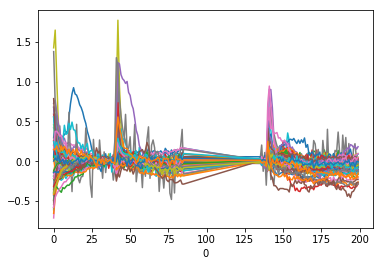

In [5]:
initial.T.plot(legend=False)

In [6]:
renamed = {a : b for a, b in zip(list(initial.columns), range(len(list(initial.columns))))}

In [7]:
initial.rename(columns=renamed, inplace=True)

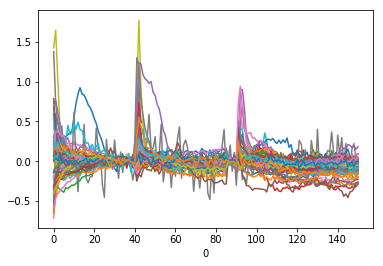

In [8]:
initial.T.plot(legend=False)

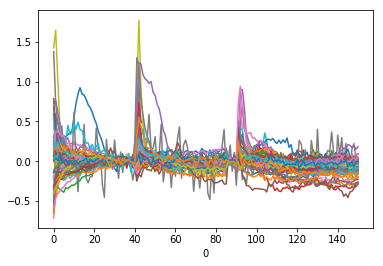

In [9]:
initial.T.plot(legend=False)

## Dropper fn

In [10]:
def frameRemoval(df, start, end):
    '''Removes the frames between start and end (incl excl) and returns a new df'''
    assert (start >= 0) and (start < end) and (end <= len(df.columns))
    df = df.drop(range(start, end), axis=1)
    renamed = {a : b for a, b in zip(list(df.columns), range(len(list(df.columns))))}
    df.rename(columns=renamed, inplace=True)
    return df

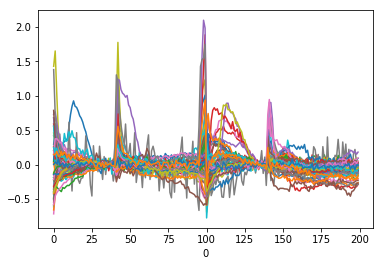

In [11]:
initial = pd.read_csv(r"data\\190819_file24_concat.csv", index_col=0, header=None).T
initial.T.plot(legend=False)

In [12]:
dropped = frameRemoval(initial, 86, 134)

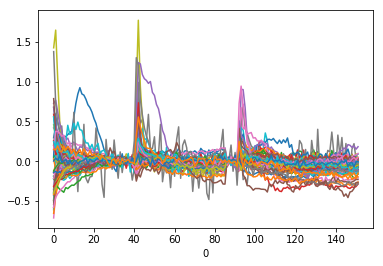

In [13]:
dropped.T.plot(legend=False)

# PCA

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
from importHelpers.response import *
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

In [25]:
df = removeLowSTD(dropped, 3)
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(df)
principalDf = pd.DataFrame(data = principalComponents)

In [26]:
p = list(pca.inverse_transform(principalComponents)[0])
b = list(df.iloc[0])

<IPython.core.display.Javascript object>


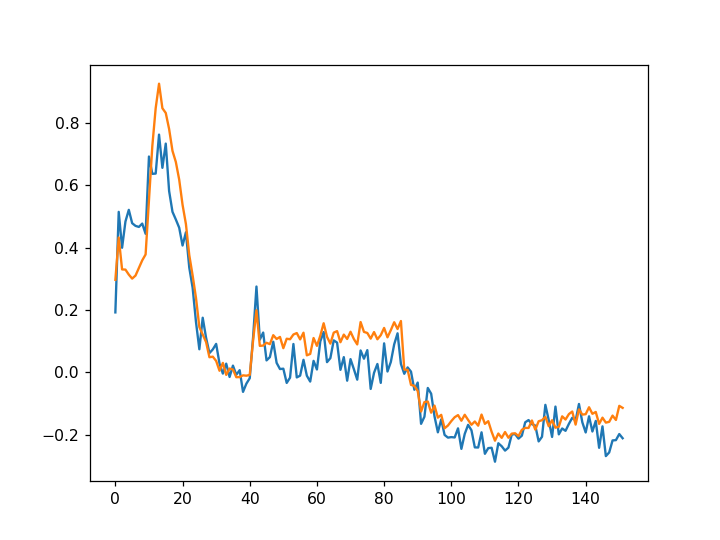

In [30]:
%matplotlib notebook
plt2 = plt.figure()
plt.plot(p)
plt.plot(b)
plt.show()

In [31]:
principalComponents[0]

array([ 0.62819395,  2.55276667,  0.42096889, -0.10265814,  0.92782526])

<IPython.core.display.Javascript object>


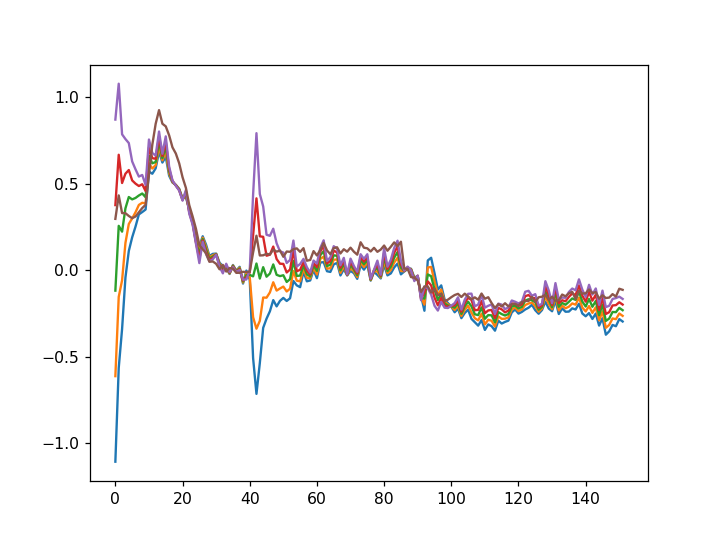

In [32]:
trialPCAB = np.array([[x,  2.55276667,  0.42096889, -0.10265814,  0.92782526] for x in range(-2, 3)])
trialBackB = pca.inverse_transform(trialPCAB)
%matplotlib notebook
plt4 = plt.figure()
plt.plot(trialBackB[0])
plt.plot(trialBackB[1])
plt.plot(trialBackB[2])
plt.plot(trialBackB[3])
plt.plot(trialBackB[4])
plt.plot(list(df.iloc[0]))
plt.show()

<IPython.core.display.Javascript object>


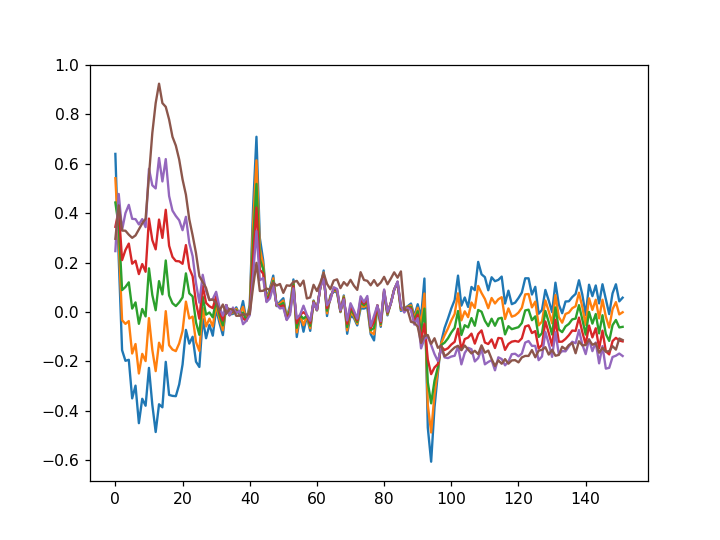

In [33]:
trialPCAB = np.array([[0.62819395,  x,  0.42096889, -0.10265814,  0.92782526] for x in range(-2, 3)])
trialBackB = pca.inverse_transform(trialPCAB)
%matplotlib notebook
plt4 = plt.figure()
plt.plot(trialBackB[0])
plt.plot(trialBackB[1])
plt.plot(trialBackB[2])
plt.plot(trialBackB[3])
plt.plot(trialBackB[4])
plt.plot(list(df.iloc[0]))
plt.show()

<IPython.core.display.Javascript object>


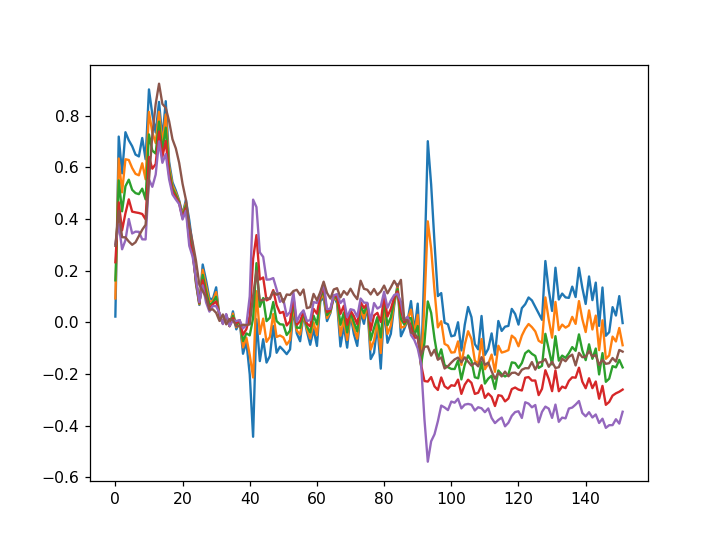

In [34]:
trialPCAB = np.array([[0.62819395,  2.55276667,  x, -0.10265814,  0.92782526] for x in range(-2, 3)])
trialBackB = pca.inverse_transform(trialPCAB)
%matplotlib notebook
plt4 = plt.figure()
plt.plot(trialBackB[0])
plt.plot(trialBackB[1])
plt.plot(trialBackB[2])
plt.plot(trialBackB[3])
plt.plot(trialBackB[4])
plt.plot(list(df.iloc[0]))
plt.show()

<IPython.core.display.Javascript object>


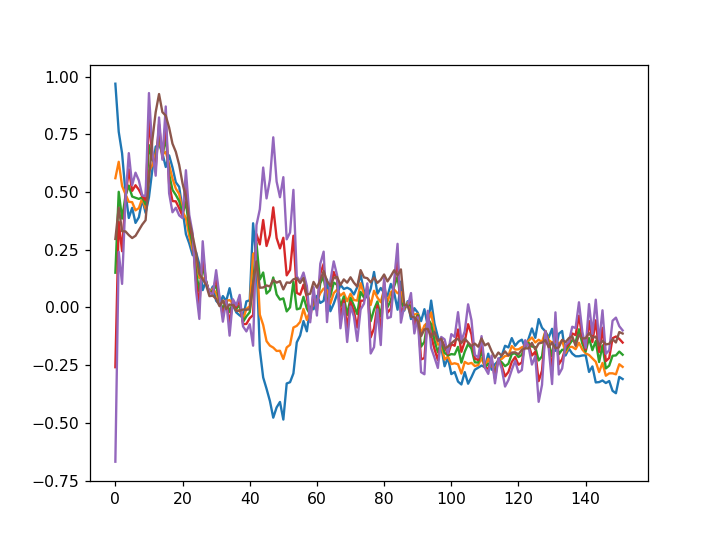

In [35]:
trialPCAB = np.array([[0.62819395,  2.55276667,  0.42096889, x,  0.92782526] for x in range(-2, 3)])
trialBackB = pca.inverse_transform(trialPCAB)
%matplotlib notebook
plt4 = plt.figure()
plt.plot(trialBackB[0])
plt.plot(trialBackB[1])
plt.plot(trialBackB[2])
plt.plot(trialBackB[3])
plt.plot(trialBackB[4])
plt.plot(list(df.iloc[0]))
plt.show()

<IPython.core.display.Javascript object>


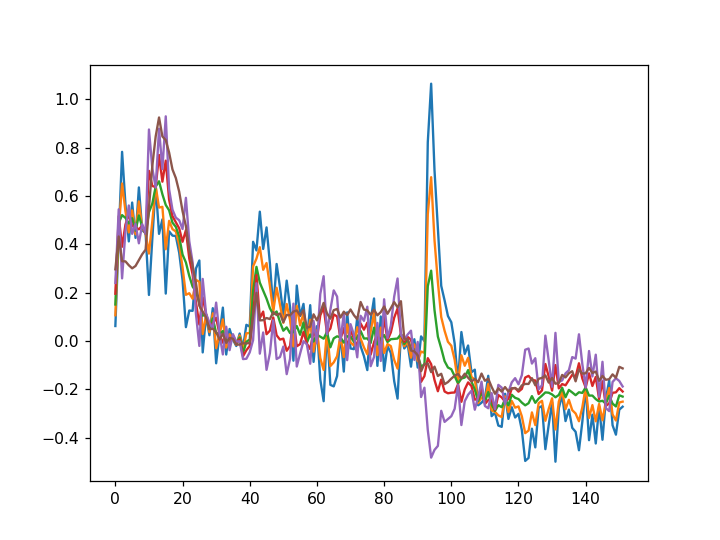

In [36]:
trialPCAB = np.array([[0.62819395,  2.55276667,  0.42096889, -0.10265814,  x] for x in range(-2, 3)])
trialBackB = pca.inverse_transform(trialPCAB)
%matplotlib notebook
plt4 = plt.figure()
plt.plot(trialBackB[0])
plt.plot(trialBackB[1])
plt.plot(trialBackB[2])
plt.plot(trialBackB[3])
plt.plot(trialBackB[4])
plt.plot(list(df.iloc[0]))
plt.show()

# Clustering by K-Means

In [103]:
nc = 6
df = frameToSecDF(dropped)
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(df)
principalDf = pd.DataFrame(data = principalComponents)
kmeans = KMeans(n_clusters=nc).fit(principalDf)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
print("labels: ", labels)
l = []
for i in range(nc):
    temp = []
    for j in range(len(labels)):
        if labels[j] == i:
            temp += [j + 1]
    l += [temp]

out = [0] * 52
dfrows =list(df.index)
out = list(labels)

data = {'in': list(initial.index), 'out': out}
outdf = pd.DataFrame.from_dict(data)
o_outdf = outdf[["out", "in"]].sort_values(by=['out', "in"])

labels:  [4 1 5 1 4 5 1 5 5 5 0 0 0 0 0 1 5 0 3 4 0 5 5 0 2 5 5 3 0 5 0 5 5 0 5 1 5
 5 0 0 5 1 5 5 0 0 0 5 5 0 0 0]


In [119]:
outdf

in  out
0    1    4
1    2    1
2    3    5
3    4    1
4    5    4
5    6    5
6    7    1
7    8    5
8    9    5
9   10    5
10  11    0
11  12    0
12  13    0
13  14    0
14  15    0
15  16    1
16  17    5
17  18    0
18  19    3
19  20    4
20  21    0
21  22    5
22  23    5
23  24    0
24  25    2
25  26    5
26  27    5
27  28    3
28  29    0
29  30    5
30  31    0
31  32    5
32  33    5
33  34    0
34  35    5
35  36    1
36  37    5
37  38    5
38  39    0
39  40    0
40  41    5
41  42    1
42  43    5
43  44    5
44  45    0
45  46    0
46  47    0
47  48    5
48  49    5
49  50    0
50  51    0
51  52    0

# Clustering by DBSCAN

In [41]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

In [105]:
db = DBSCAN(eps=0.6, min_samples=2).fit(df)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
dlabels = db.labels_
dlabels + 1

array([0, 1, 2, 0, 0, 2, 0, 0, 0, 3, 0, 0, 0, 0, 4, 1, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 3, 0, 5, 0, 0, 0, 3, 0, 0, 3, 4, 0, 3, 0, 3, 3,
       5, 5, 0, 3, 3, 4, 3, 0], dtype=int32)

In [106]:
n_clusters_ = len(set(dlabels)) - (1 if -1 in dlabels else 0)
n_noise_ = list(dlabels).count(-1)
n_clusters_

5

In [107]:
data = {'in': list(initial.index), 'out': list(dlabels + 1)}
doutdf = pd.DataFrame.from_dict(data)

In [110]:
doutdf

in  out
0    1    0
1    2    1
2    3    2
3    4    0
4    5    0
5    6    2
6    7    0
7    8    0
8    9    0
9   10    3
10  11    0
11  12    0
12  13    0
13  14    0
14  15    4
15  16    1
16  17    2
17  18    0
18  19    0
19  20    0
20  21    0
21  22    0
22  23    0
23  24    0
24  25    0
25  26    0
26  27    0
27  28    0
28  29    3
29  30    0
30  31    5
31  32    0
32  33    0
33  34    0
34  35    3
35  36    0
36  37    0
37  38    3
38  39    4
39  40    0
40  41    3
41  42    0
42  43    3
43  44    3
44  45    5
45  46    5
46  47    0
47  48    3
48  49    3
49  50    4
50  51    3
51  52    0

In [113]:
from importHelpers.combine import *

In [118]:
l = [outdf.set_index("in").to_dict()['out'], doutdf.set_index("in").to_dict()['out']]
listToDF(mergeProcedure(l), list(initial.index.values))

1    2    3    4    5    6    7    8    9    10 ...    43   44   45   46  \
x                                                   ...                        
1    0  0.0  0.0  0.5  1.0  0.0  0.5  0.5  0.5  0.0 ...   0.0  0.0  0.0  0.0   
2    0  0.0  0.0  0.5  0.0  0.0  0.5  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
3    0  0.0  0.0  0.0  0.0  1.0  0.0  0.5  0.5  0.5 ...   0.5  0.5  0.0  0.0   
4    0  0.0  0.0  0.0  0.5  0.0  1.0  0.5  0.5  0.0 ...   0.0  0.0  0.0  0.0   
5    0  0.0  0.0  0.0  0.0  0.0  0.5  0.5  0.5  0.0 ...   0.0  0.0  0.0  0.0   
6    0  0.0  0.0  0.0  0.0  0.0  0.0  0.5  0.5  0.5 ...   0.5  0.5  0.0  0.0   
7    0  0.0  0.0  0.0  0.0  0.0  0.0  0.5  0.5  0.0 ...   0.0  0.0  0.0  0.0   
8    0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.5 ...   0.5  0.5  0.0  0.0   
9    0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.5 ...   0.5  0.5  0.0  0.0   
10   0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   1.0  1.0  0.0  0.0   
11   0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.5  0.5   
12   0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.5  0.5   
13   0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.5  0.5   
14   0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.5  0.5   
15   0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.5  0.5   
16   0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
17   0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.5  0.5  0.0  0.0   
18   0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.5  0.5   
19   0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
20   0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
21   0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.5  0.5   
22   0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.5  0.5  0.0  0.0   
23   0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.5  0.5  0.0  0.0   
24   0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.5  0.5   
25   0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
26   0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.5  0.5  0.0  0.0   
27   0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.5  0.5  0.0  0.0   
28   0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
29   0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.5  0.5  0.5  0.5   
30   0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.5  0.5  0.0  0.0   
31   0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  1.0  1.0   
32   0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.5  0.5  0.0  0.0   
33   0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.5  0.5  0.0  0.0   
34   0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.5  0.5   
35   0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   1.0  1.0  0.0  0.0   
36   0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
37   0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.5  0.5  0.0  0.0   
38   0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   1.0  1.0  0.0  0.0   
39   0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.5  0.5   
40   0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.5  0.5   
41   0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   1.0  1.0  0.0  0.0   
42   0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
43   0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  1.0  0.0  0.0   
44   0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
45   0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  1.0   
46   0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
47   0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
48   0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
49  

In [128]:
initial.insert(0, "K-Means Clustering", labels)
initial.insert(1, "DBSCAN Clustering", dlabels + 1)

<IPython.core.display.Javascript object>


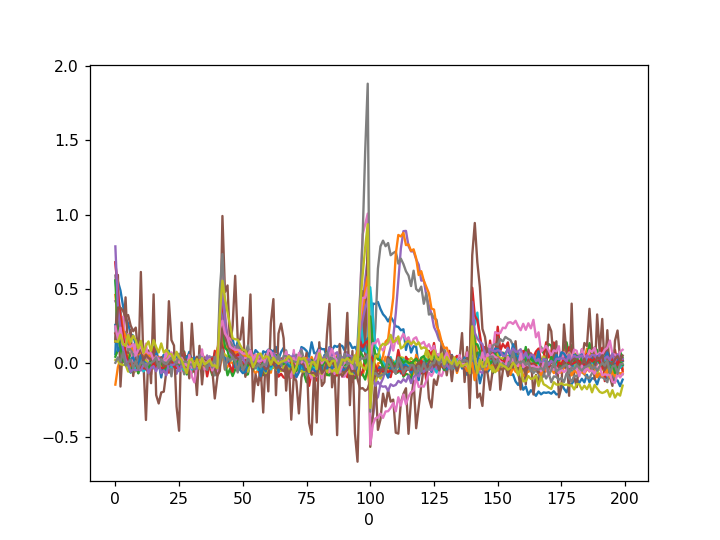

<IPython.core.display.Javascript object>


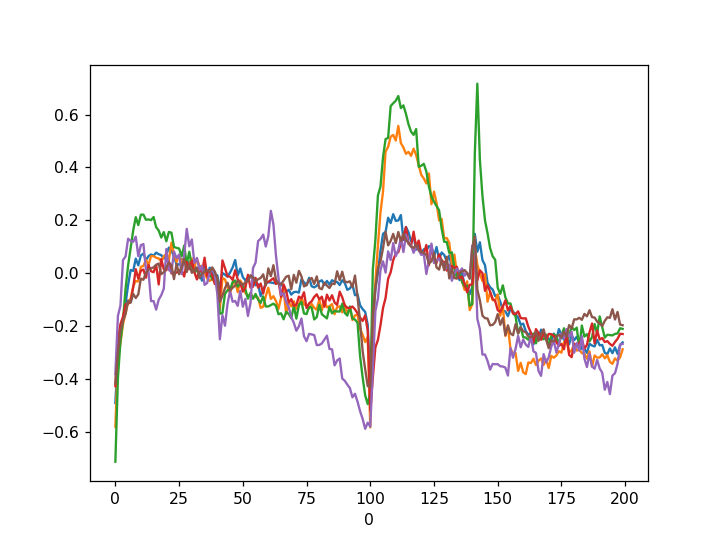

<IPython.core.display.Javascript object>


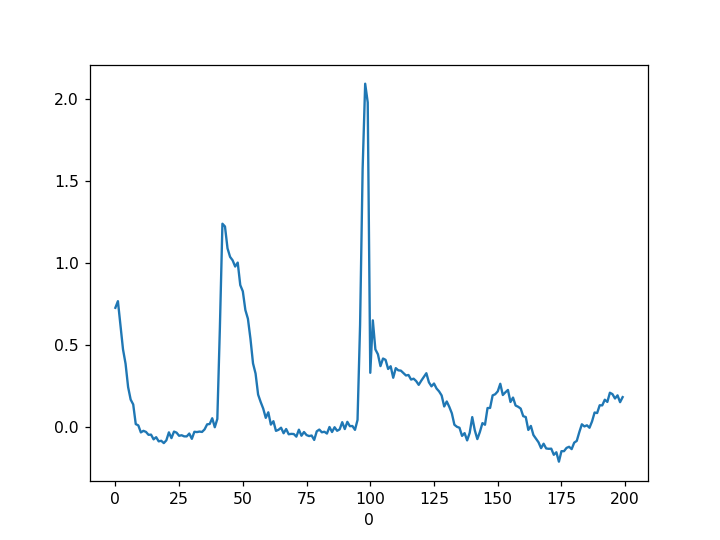

<IPython.core.display.Javascript object>


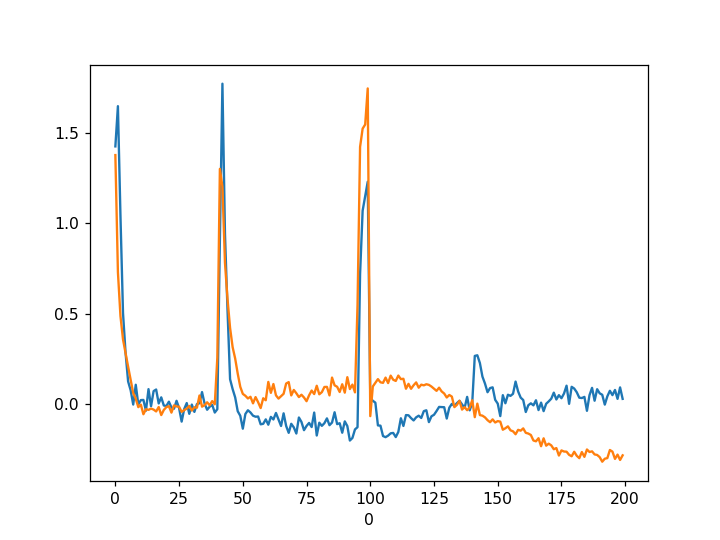

<IPython.core.display.Javascript object>


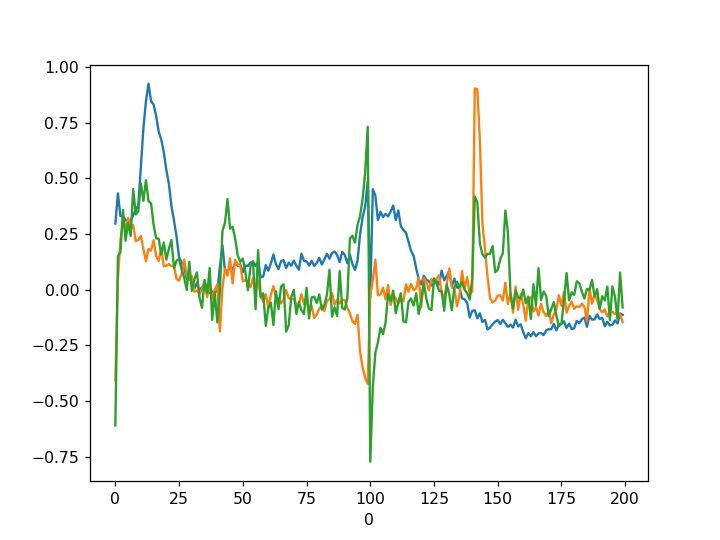

<IPython.core.display.Javascript object>


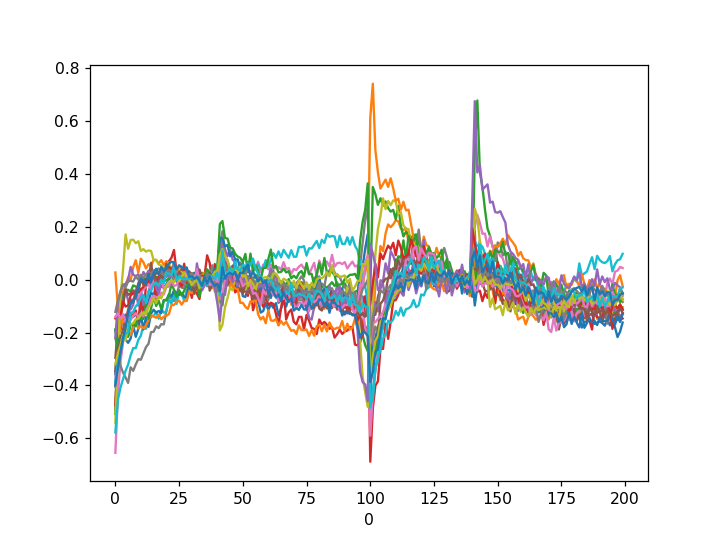

In [138]:
initial.loc[initial['K-Means Clustering'] == 0].drop(["K-Means Clustering", "DBSCAN Clustering"], axis = 1).T.plot(legend=False)
initial.loc[initial['K-Means Clustering'] == 1].drop(["K-Means Clustering", "DBSCAN Clustering"], axis = 1).T.plot(legend=False)
initial.loc[initial['K-Means Clustering'] == 2].drop(["K-Means Clustering", "DBSCAN Clustering"], axis = 1).T.plot(legend=False)
initial.loc[initial['K-Means Clustering'] == 3].drop(["K-Means Clustering", "DBSCAN Clustering"], axis = 1).T.plot(legend=False)
initial.loc[initial['K-Means Clustering'] == 4].drop(["K-Means Clustering", "DBSCAN Clustering"], axis = 1).T.plot(legend=False)
initial.loc[initial['K-Means Clustering'] == 5].drop(["K-Means Clustering", "DBSCAN Clustering"], axis = 1).T.plot(legend=False)


<IPython.core.display.Javascript object>


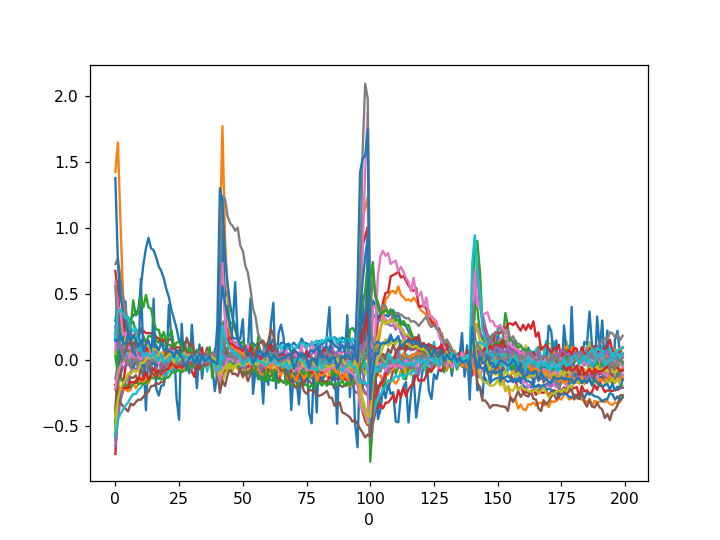

<IPython.core.display.Javascript object>


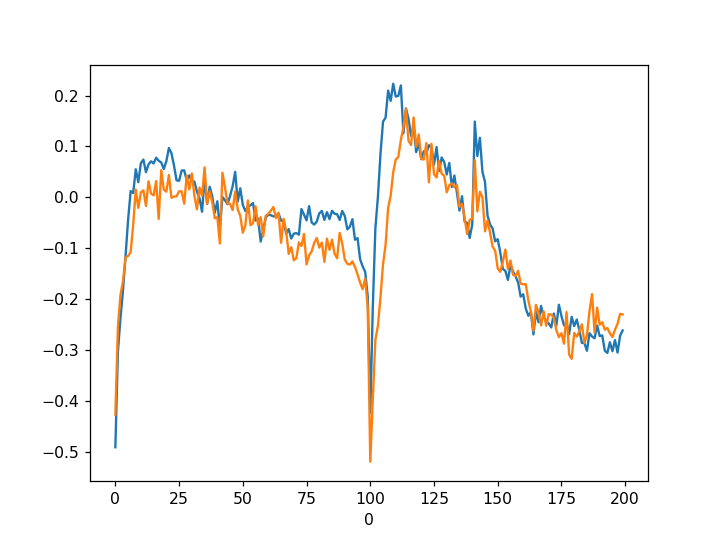

<IPython.core.display.Javascript object>


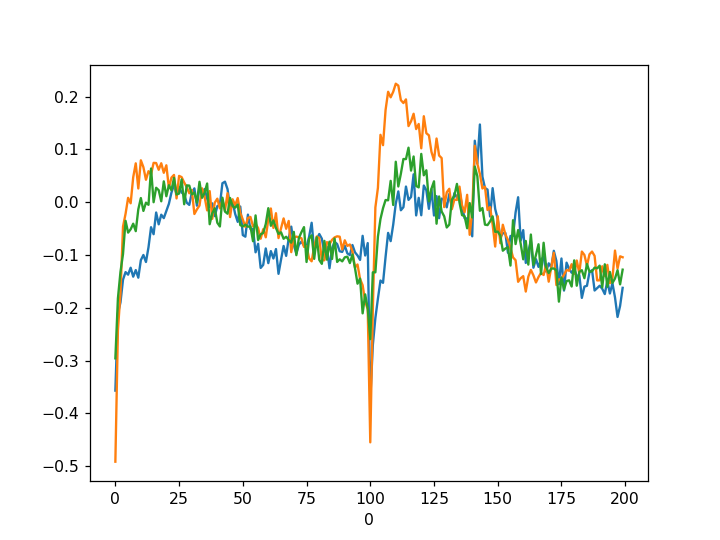

<IPython.core.display.Javascript object>


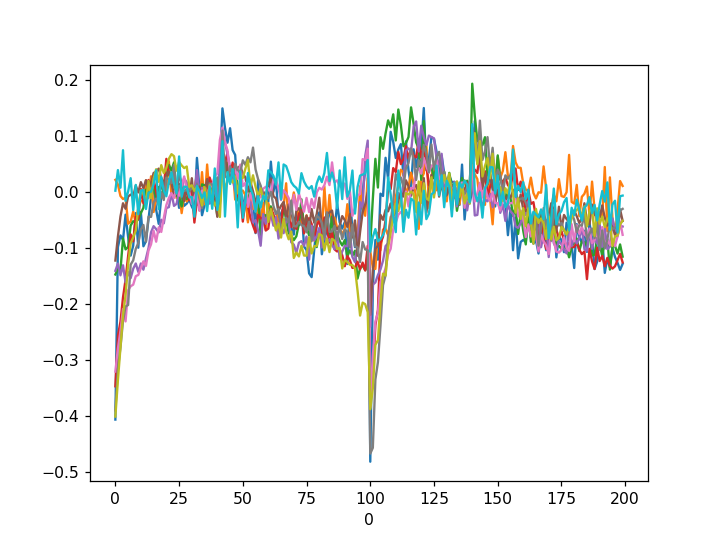

<IPython.core.display.Javascript object>


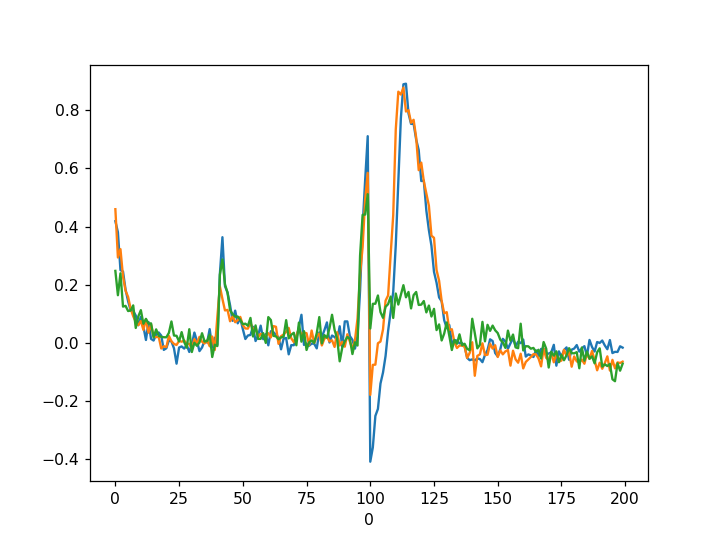

<IPython.core.display.Javascript object>


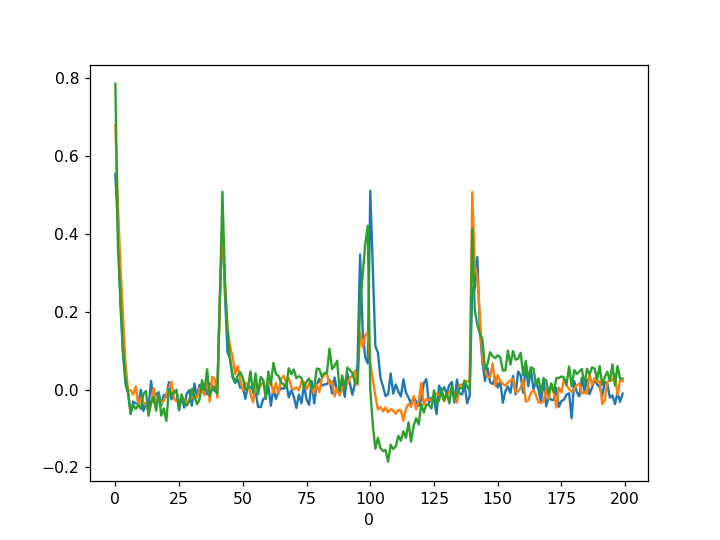

In [139]:

initial.loc[initial['DBSCAN Clustering'] == 0].drop(["K-Means Clustering", "DBSCAN Clustering"], axis = 1).T.plot(legend=False)
initial.loc[initial['DBSCAN Clustering'] == 1].drop(["K-Means Clustering", "DBSCAN Clustering"], axis = 1).T.plot(legend=False)
initial.loc[initial['DBSCAN Clustering'] == 2].drop(["K-Means Clustering", "DBSCAN Clustering"], axis = 1).T.plot(legend=False)
initial.loc[initial['DBSCAN Clustering'] == 3].drop(["K-Means Clustering", "DBSCAN Clustering"], axis = 1).T.plot(legend=False)
initial.loc[initial['DBSCAN Clustering'] == 4].drop(["K-Means Clustering", "DBSCAN Clustering"], axis = 1).T.plot(legend=False)
initial.loc[initial['DBSCAN Clustering'] == 5].drop(["K-Means Clustering", "DBSCAN Clustering"], axis = 1).T.plot(legend=False)

In [170]:
trial = initial.loc[initial['DBSCAN Clustering'] == 1].drop(["K-Means Clustering", "DBSCAN Clustering"], axis = 1)
display(trial.describe())

0           0         1         2         3         4         5         6    \
count  2.000000  2.000000  2.000000  2.000000  2.000000  2.000000  2.000000   
mean  -0.459165 -0.279036 -0.214825 -0.173436 -0.116451 -0.079584 -0.047705   
std    0.045359  0.034570  0.032134  0.012598  0.002044  0.050547  0.084783   
min   -0.491238 -0.303480 -0.237546 -0.182344 -0.117896 -0.115326 -0.107655   
25%   -0.475201 -0.291258 -0.226185 -0.177890 -0.117174 -0.097455 -0.077680   
50%   -0.459165 -0.279036 -0.214825 -0.173436 -0.116451 -0.079584 -0.047705   
75%   -0.443128 -0.266813 -0.203464 -0.168982 -0.115728 -0.061713 -0.017730   
max   -0.427091 -0.254591 -0.192103 -0.164528 -0.115005 -0.043841  0.012246   

0           7         8         9      ...          190       191       192  \
count  2.000000  2.000000  2.000000    ...     2.000000  2.000000  2.000000   
mean  -0.022435  0.035179  0.004621    ...    -0.261638 -0.258384 -0.280717   
std    0.043955  0.028300  0.035725    ...     0.015647  0.018415  0.029072   
min   -0.053516  0.015169 -0.020641    ...    -0.272702 -0.271406 -0.301274   
25%   -0.037976  0.025174 -0.008010    ...    -0.267170 -0.264895 -0.290995   
50%   -0.022435  0.035179  0.004621    ...    -0.261638 -0.258384 -0.280717   
75%   -0.006895  0.045185  0.017251    ...    -0.256106 -0.251874 -0.270438   
max    0.008646  0.055190  0.029882    ...    -0.250574 -0.245363 -0.260160   

0           193       194       195       196       197       198       199  
count  2.000000  2.000000  2.000000  2.000000  2.000000  2.000000  2.000000  
mean  -0.281368 -0.276025 -0.288504 -0.270342 -0.276778 -0.250689 -0.245796  
std    0.034719  0.012376  0.019756  0.014329  0.040166  0.030367  0.022350  
min   -0.305918 -0.284776 -0.302474 -0.280474 -0.305179 -0.272161 -0.261600  
25%   -0.293643 -0.280400 -0.295489 -0.275408 -0.290979 -0.261425 -0.253698  
50%   -0.281368 -0.276025 -0.288504 -0.270342 -0.276778 -0.250689 -0.245796  
75%   -0.269093 -0.271649 -0.281519 -0.265276 -0.262577 -0.239952 -0.237894  
max   -0.256818 -0.267274 -0.274534 -0.260210 -0.248376 -0.229216 -0.229992  

[8 rows x 200 columns]

In [174]:
z = list(trial.describe().index)
z.remove("mean")
z

q = list(trial.describe().index)
q.remove("std")
q

['count', 'mean', 'min', '25%', '50%', '75%', 'max']

<IPython.core.display.Javascript object>


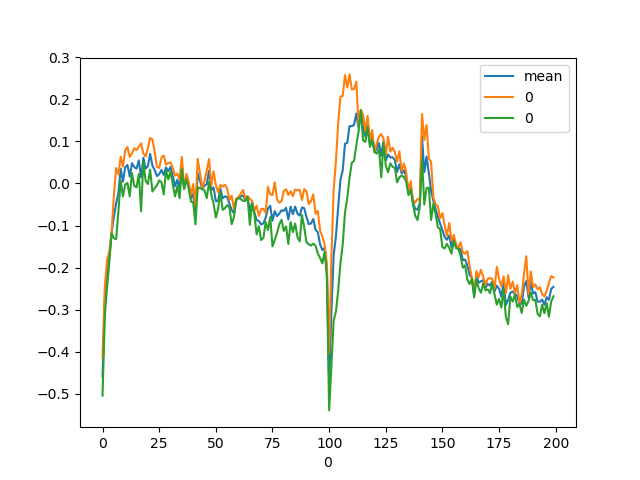

<IPython.core.display.Javascript object>


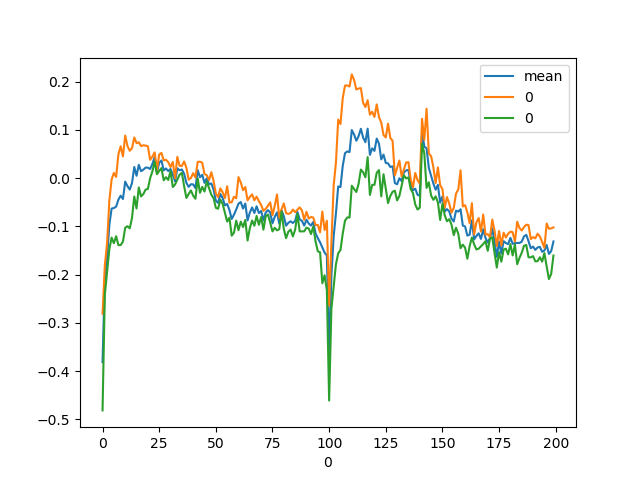

<IPython.core.display.Javascript object>


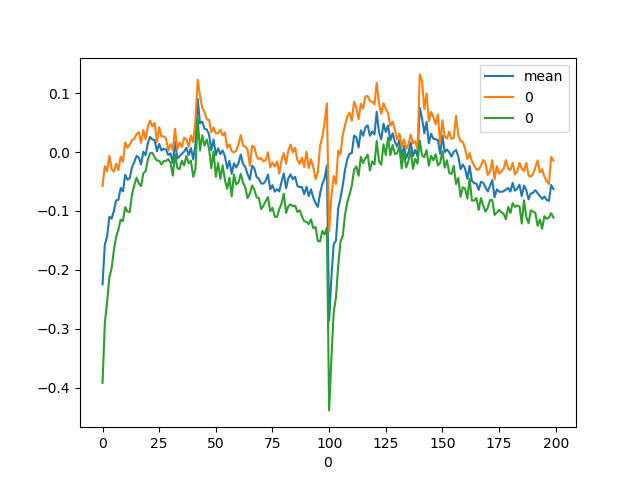

<IPython.core.display.Javascript object>


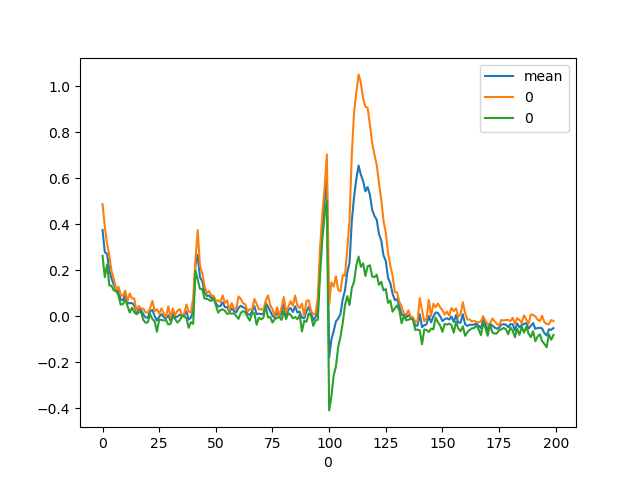

<IPython.core.display.Javascript object>


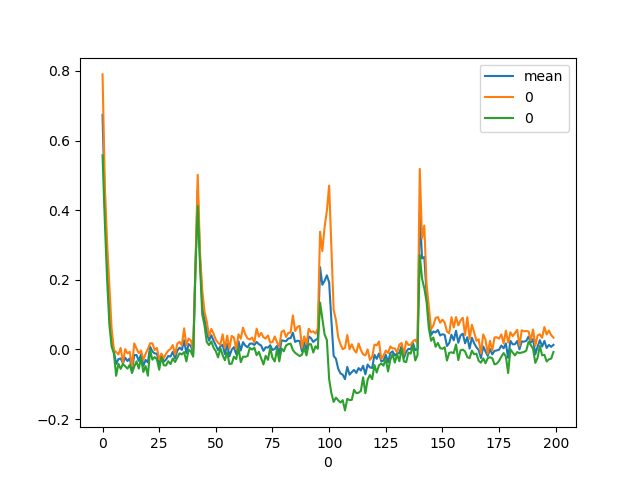

In [196]:
trial = initial.loc[initial['DBSCAN Clustering'] == 1].drop(["K-Means Clustering", "DBSCAN Clustering"], axis = 1)
pd.concat([trial.describe().drop(z), (trial.describe().loc['mean'] + trial.describe().loc['std']).to_frame().T, (trial.describe().loc['mean'] - trial.describe().loc['std']).to_frame().T]).T.plot()
trial = initial.loc[initial['DBSCAN Clustering'] == 2].drop(["K-Means Clustering", "DBSCAN Clustering"], axis = 1)
pd.concat([trial.describe().drop(z), (trial.describe().loc['mean'] + trial.describe().loc['std']).to_frame().T, (trial.describe().loc['mean'] - trial.describe().loc['std']).to_frame().T]).T.plot()
trial = initial.loc[initial['DBSCAN Clustering'] == 3].drop(["K-Means Clustering", "DBSCAN Clustering"], axis = 1)
pd.concat([trial.describe().drop(z), (trial.describe().loc['mean'] + trial.describe().loc['std']).to_frame().T, (trial.describe().loc['mean'] - trial.describe().loc['std']).to_frame().T]).T.plot()
trial = initial.loc[initial['DBSCAN Clustering'] == 4].drop(["K-Means Clustering", "DBSCAN Clustering"], axis = 1)
pd.concat([trial.describe().drop(z), (trial.describe().loc['mean'] + trial.describe().loc['std']).to_frame().T, (trial.describe().loc['mean'] - trial.describe().loc['std']).to_frame().T]).T.plot()
trial = initial.loc[initial['DBSCAN Clustering'] == 5].drop(["K-Means Clustering", "DBSCAN Clustering"], axis = 1)
pd.concat([trial.describe().drop(z), (trial.describe().loc['mean'] + trial.describe().loc['std']).to_frame().T, (trial.describe().loc['mean'] - trial.describe().loc['std']).to_frame().T]).T.plot()


In [187]:
trial = initial.loc[initial['DBSCAN Clustering'] == 1].drop(["K-Means Clustering", "DBSCAN Clustering"], axis = 1)
pd.concat([trial.describe().drop(z), (trial.describe().loc['mean'] + trial.describe().loc['std']).to_frame().T, (trial.describe().loc['mean'] - trial.describe().loc['std']).to_frame().T]).T.plot()

trial = initial.loc[initial['DBSCAN Clustering'] == 2].drop(["K-Means Clustering", "DBSCAN Clustering"], axis = 1)
ms = trial.describe().drop(z)
ms.T.plot()
trial = initial.loc[initial['DBSCAN Clustering'] == 3].drop(["K-Means Clustering", "DBSCAN Clustering"], axis = 1)
ms = trial.describe().drop(z)
ms.T.plot()
trial = initial.loc[initial['DBSCAN Clustering'] == 4].drop(["K-Means Clustering", "DBSCAN Clustering"], axis = 1)
ms = trial.describe().drop(z)
ms.T.plot()
trial = initial.loc[initial['DBSCAN Clustering'] == 5].drop(["K-Means Clustering", "DBSCAN Clustering"], axis = 1)
ms = trial.describe().drop(z)
ms.T.plot()


'\ntrial = initial.loc[initial[\'DBSCAN Clustering\'] == 2].drop(["K-Means Clustering", "DBSCAN Clustering"], axis = 1)\nms = trial.describe().drop(z)\nms.T.plot()\ntrial = initial.loc[initial[\'DBSCAN Clustering\'] == 3].drop(["K-Means Clustering", "DBSCAN Clustering"], axis = 1)\nms = trial.describe().drop(z)\nms.T.plot()\ntrial = initial.loc[initial[\'DBSCAN Clustering\'] == 4].drop(["K-Means Clustering", "DBSCAN Clustering"], axis = 1)\nms = trial.describe().drop(z)\nms.T.plot()\ntrial = initial.loc[initial[\'DBSCAN Clustering\'] == 5].drop(["K-Means Clustering", "DBSCAN Clustering"], axis = 1)\nms = trial.describe().drop(z)\nms.T.plot()\n'

In [190]:
azz = trial.describe().drop(z)

In [191]:
azx = (trial.describe().loc['mean'] + trial.describe().loc['std']).to_frame().T

<IPython.core.display.Javascript object>


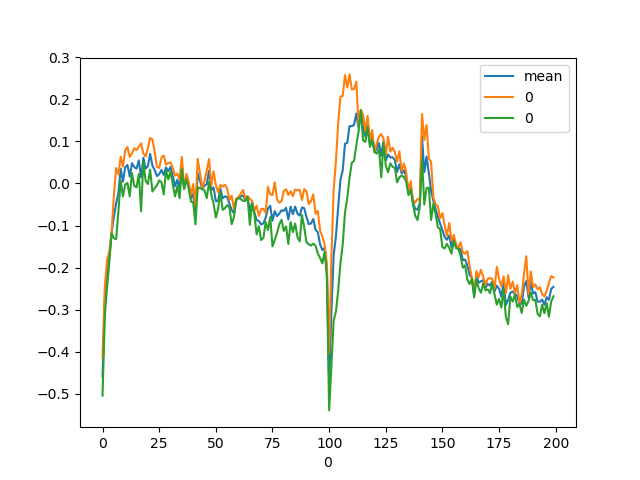

In [195]:
pd.concat([trial.describe().drop(z), (trial.describe().loc['mean'] + trial.describe().loc['std']).to_frame().T, (trial.describe().loc['mean'] - trial.describe().loc['std']).to_frame().T]).T.plot()

In [197]:
pd.concat([trial.describe().drop(z), (trial.describe().loc['mean'] + trial.describe().loc['std']).to_frame().T, (trial.describe().loc['mean'] - trial.describe().loc['std']).to_frame().T])

0          0         1         2         3         4         5         6    \
mean  0.673854  0.420969  0.255316  0.127358  0.034147 -0.006341 -0.041544   
0     0.789919  0.474366  0.309020  0.182233  0.060095 -0.001360 -0.007445   
0     0.557788  0.367571  0.201613  0.072484  0.008199 -0.011323 -0.075643   

0          7         8         9      ...          190       191       192  \
mean -0.027759 -0.025862 -0.039482    ...     0.029589 -0.013933  0.007924   
0    -0.014346  0.004165 -0.037243    ...     0.057376  0.010724  0.039888   
0    -0.041173 -0.055890 -0.041721    ...     0.001801 -0.038590 -0.024041   

0          193       194       195       196       197       198       199  
mean  0.026749  0.008172  0.024526  0.004124  0.012902  0.007363  0.013163  
0     0.043474  0.033269  0.064425  0.042935  0.054253  0.041095  0.033654  
0     0.010024 -0.016924 -0.015373 -0.034686 -0.028450 -0.026368 -0.007328  

[3 rows x 200 columns]